<a href="https://www.kaggle.com/code/kenedyducheine/infidelity?scriptVersionId=131490825" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fairs-extramarital-affairs-data/Affairs.csv


In [2]:
data = pd.read_csv("/kaggle/input/fairs-extramarital-affairs-data/Affairs.csv")
data.head(10)

,Unnamed: 0,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,4,0,male,37.0,10.00,no,3,18,7,4
1,5,0,female,27.0,4.00,no,4,14,6,4
2,11,0,female,32.0,15.00,yes,1,12,1,4
3,16,0,male,57.0,15.00,yes,5,18,6,5
4,23,0,male,22.0,0.75,no,2,17,6,3
5,29,0,female,32.0,1.50,no,2,17,5,5
6,44,0,female,22.0,0.75,no,2,12,1,3
7,45,0,male,57.0,15.00,yes,2,14,4,4
8,47,0,female,32.0,15.00,yes,4,16,1,2
9,49,0,male,22.0,1.50,no,4,14,4,5


In [3]:
# fixing Hollingsheads colnames and responses to be useable! 
# https://rpubs.com/cngonz05/affairs 

#unnamed means what?

#religiousness: 1 = anti, 2 = slightly against,
# 3 = relgious/spirtual, 4 = consideraly regligious, 5 = very religious

# education - assumption: years from 1st grade, 12 = highschool graduation, 16 = bacheolors, 
# 20 = graduate school of 4 years, med school

#occuption (Hollingshead's classification for occupation is 0-9, 
# this dataset includes 1-7): 1 = higher 
 

In [4]:
print(sum(data['affairs']))
print(len(data))

875
601


In [5]:
import matplotlib
import matplotlib.pyplot as plt

In [6]:
had_affairs = data[data['affairs'] > 0]
had_affairs.head()

,Unnamed: 0,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
451,6,3,male,27.0,1.500,no,3,18,4,4
452,12,3,female,27.0,4.000,yes,3,17,1,5
453,43,7,male,37.0,15.000,yes,5,18,6,2
454,53,12,female,32.0,10.000,yes,3,17,5,2
455,67,1,male,22.0,0.125,no,4,16,5,5


In [7]:
affairs_parents = had_affairs[had_affairs['children'] == 'yes']
affairs_childless = had_affairs[had_affairs['children'] == 'no']

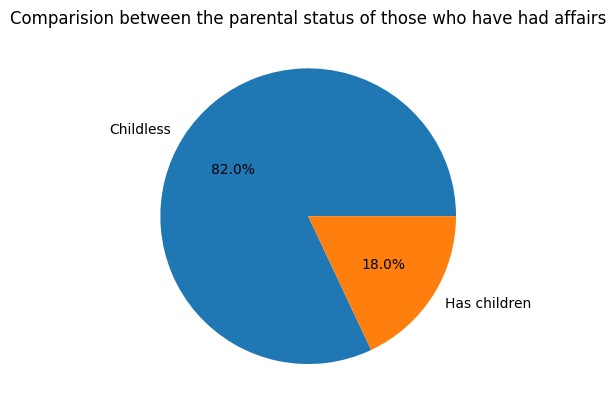

In [8]:
#parents vs not parents who HAVE HAD affairs 

parents_pie_data = (len(affairs_parents), len(affairs_childless))
parents_pie_labels = ['Childless', 'Has children']
infidelity_pie = plt.pie(parents_pie_data, labels=parents_pie_labels, autopct='%1.1f%%')
plt.title('Comparision between the parental status of those who have had affairs')
plt.show()

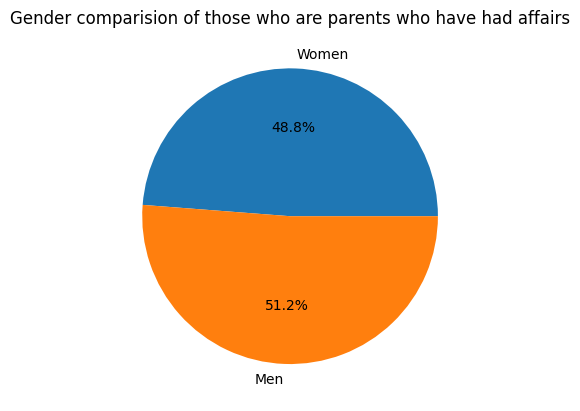

In [9]:
# gender comparsion of parents who have had affairs 
affairs_parents_women = affairs_parents[affairs_parents['gender'] == 'female'] 
affairs_parents_men = affairs_parents[affairs_parents['gender'] == 'male']

affairs_parents_gender_labels = ['Women', 'Men']
affairs_parent_gender_data = (len(affairs_parents_women), len(affairs_parents_men))

affairs_gender_pie = plt.pie(affairs_parent_gender_data, labels = affairs_parents_gender_labels, autopct = '%1.1f%%')
plt.title('Gender comparision of those who are parents who have had affairs')
plt.show()


Text(0.5, 1.0, 'Gender comparision between those who have had affairs')

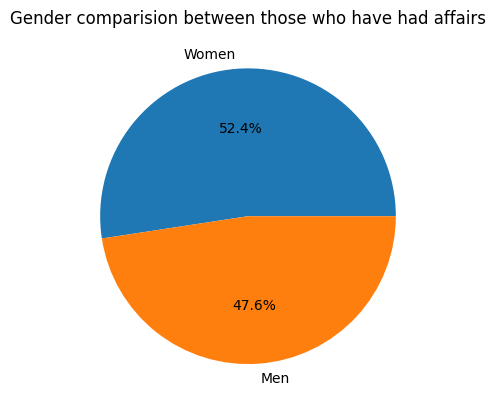

In [10]:
#gender comparison of those who have had affairs

affairs_women = data[data['gender'] == 'female']
affairs_men = data[data['gender'] == 'male']

affairs_gender_data = (len(affairs_women), len(affairs_men))
affairs_gender_label = ('Women', 'Men')

affairs_gender_pie = plt.pie(affairs_gender_data, labels = affairs_gender_label, autopct = '%1.1f%%')
plt.title('Gender comparision between those who have had affairs')

In [11]:
data2 = data.copy()
data2.head()

,Unnamed: 0,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,4,0,male,37.0,10.00,no,3,18,7,4
1,5,0,female,27.0,4.00,no,4,14,6,4
2,11,0,female,32.0,15.00,yes,1,12,1,4
3,16,0,male,57.0,15.00,yes,5,18,6,5
4,23,0,male,22.0,0.75,no,2,17,6,3


In [12]:
## relgiousness 
import re
    
data2['religiousness'].replace(1, 'anti-religion', inplace = True, limit = 601)
data2['religiousness'].replace(2, 'not religious', inplace = True, limit = 601)
data2['religiousness'].replace(3, 'slightly religious', inplace = True, limit = 601)
data2['religiousness'].replace(4, 'somewhat religious', inplace = True, limit = 601)
data2['religiousness'].replace(5, 'very religious', inplace = True, limit = 601)

#anti - 1 , not - 2 , slightly - 3, somewhat - 4, very - 5

In [13]:
data2.head()

,Unnamed: 0,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,4,0,male,37.0,10.00,no,slightly religious,18,7,4
1,5,0,female,27.0,4.00,no,somewhat religious,14,6,4
2,11,0,female,32.0,15.00,yes,anti-religion,12,1,4
3,16,0,male,57.0,15.00,yes,very religious,18,6,5
4,23,0,male,22.0,0.75,no,not religious,17,6,3


In [14]:
##education 
data2['education'].replace(12, 'hs graduate', inplace = True, limit = 601)
data2['education'].replace(9, 'grade school', inplace = True, limit = 601)
data2['education'].replace(14, 'some college', inplace = True, limit = 601)
data2['education'].replace(16, 'college graduate', inplace = True, limit = 601)
data2['education'].replace(17, 'some graduate work', inplace = True, limit = 601)
data2['education'].replace(18, "master's degree", inplace = True, limit = 601)
data2['education'].replace(20, 'Ph.D., M.D., or other', inplace = True, limit = 601)

#9 = grade school, 12 = high school graduate, 
#14 = some college, 16 = college graduate, 17 = some graduate work, 
#18 = master's degree, 20 = Ph.D., M.D., or other advanced degree.

In [15]:
data2.head()

,Unnamed: 0,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,4,0,male,37.0,10.00,no,slightly religious,master's degree,7,4
1,5,0,female,27.0,4.00,no,somewhat religious,some college,6,4
2,11,0,female,32.0,15.00,yes,anti-religion,hs graduate,1,4
3,16,0,male,57.0,15.00,yes,very religious,master's degree,6,5
4,23,0,male,22.0,0.75,no,not religious,some graduate work,6,3


In [16]:
data2 = data2.drop('Unnamed: 0', axis = 1)


In [17]:
data2.head()

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,0,male,37.0,10.00,no,slightly religious,master's degree,7,4
1,0,female,27.0,4.00,no,somewhat religious,some college,6,4
2,0,female,32.0,15.00,yes,anti-religion,hs graduate,1,4
3,0,male,57.0,15.00,yes,very religious,master's degree,6,5
4,0,male,22.0,0.75,no,not religious,some graduate work,6,3


In [18]:
#prediction time
from sklearn.model_selection import train_test_split

y = data2['affairs']
features = ['gender', 'age', 'yearsmarried', 'children', 'religiousness', 'education', 'occupation','rating']
x = data2[features]

train_x, valid_x, train_y, valid_y = train_test_split(x, y, random_state = 0, train_size = 0.8, test_size = 0.2)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [19]:
xp = (train_x.dtypes == 'object')
xnames = list(xp[xp].index)
print (xnames)

['gender', 'children', 'religiousness', 'education']


In [20]:
#of = ['education', 'religiousness']
#ordinalfeatures = train_x[of]

ohef = ['gender', 'children', 'education', 'religiousness']
ohefeatures = train_x[ohef]

In [21]:
#train_y.replace(0>, 1, inplace = True, limit = 601)
for i in train_y: 
    if i > 0: 
        train_y.replace(i, 1, inplace = True, limit = 601)

#valid_y.replace(0>, 1, inpalce = True, limit = 601)

In [22]:
train_y.head(20)


439    0
487    1
261    0
118    0
142    0
55     0
90     0
392    0
562    1
173    0
380    0
231    0
235    0
157    0
312    0
132    0
555    1
480    1
574    1
299    0
Name: affairs, dtype: int64

In [23]:
for i in valid_y: 
    if i > 0: 
        valid_y.replace(i, 1, inplace = True, limit = 601)

In [24]:
valid_y.head()

596    1
52     0
190    0
165    0
344    0
Name: affairs, dtype: int64

In [25]:
train_x_c = train_x.copy()
valid_x_c = valid_x.copy()


In [26]:
#pipeline free 
from sklearn.preprocessing import OneHotEncoder 
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse = False)

trainohe = pd.DataFrame(ohe.fit_transform(train_x[xnames]))
validohe = pd.DataFrame(ohe.transform(valid_x[xnames]))

trainohe.index = train_x.index
validohe.index = valid_x.index

droptrain = train_x.drop(xnames, axis = 1)
dropvalid = valid_x.drop(xnames, axis = 1)

ftrain_x = pd.concat([droptrain, trainohe], axis = 1)
fvalid_x = pd.concat([dropvalid, validohe], axis = 1)

ftrain_x.columns = ftrain_x.columns.astype(str)
fvalid_x.columns = fvalid_x.columns.astype(str)



/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [27]:
##model 
from xgboost import XGBRegressor 
from sklearn.ensemble import RandomForestRegressor 


model1 = XGBRegressor(random_state = 0, learning_rate = 0.01, n_estimators= 800, n_jobs = 4, early_stopping_rounds = 5)
model2 = RandomForestRegressor(random_state = 0, n_estimators = 800)

In [28]:
model1.fit(ftrain_x, train_y, eval_set = [(fvalid_x, valid_y)])

[0]	validation_0-rmse:0.49790
[1]	validation_0-rmse:0.49580
[2]	validation_0-rmse:0.49379
[3]	validation_0-rmse:0.49182
[4]	validation_0-rmse:0.48983
[5]	validation_0-rmse:0.48787
[6]	validation_0-rmse:0.48596
[7]	validation_0-rmse:0.48408
[8]	validation_0-rmse:0.48225
[9]	validation_0-rmse:0.48038
[10]	validation_0-rmse:0.47866
[11]	validation_0-rmse:0.47691
[12]	validation_0-rmse:0.47527
[13]	validation_0-rmse:0.47364
[14]	validation_0-rmse:0.47201
[15]	validation_0-rmse:0.47040
[16]	validation_0-rmse:0.46880
[17]	validation_0-rmse:0.46739
[18]	validation_0-rmse:0.46586
[19]	validation_0-rmse:0.46449
[20]	validation_0-rmse:0.46297
[21]	validation_0-rmse:0.46140
[22]	validation_0-rmse:0.45998
[23]	validation_0-rmse:0.45868
[24]	validation_0-rmse:0.45728
[25]	validation_0-rmse:0.45598
[26]	validation_0-rmse:0.45459
[27]	validation_0-rmse:0.45334
[28]	validation_0-rmse:0.45206
[29]	validation_0-rmse:0.45075
[30]	validation_0-rmse:0.44960
[31]	validation_0-rmse:0.44838
[32]	validation_0-

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=5,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=800, n_jobs=4, num_parallel_tree=None, predictor=None,
             random_state=0, ...)

In [29]:
predict = model1.predict(fvalid_x)


In [30]:
preddf = pd.DataFrame(predict)
preddf.head(17)

,0
0,0.169884
1,0.330109
2,0.132534
3,0.083445
4,0.214481
5,0.682921
6,0.219626
7,0.693817
8,0.346107
9,0.339108


In [31]:
max(preddf[0])

0.8894004225730896

In [32]:
from sklearn.metrics import mean_absolute_error 

print (mean_absolute_error(predict, valid_y))

0.3309263808052402


In [33]:
#notes 
#1. education column's intergers mean what?? how many years since 1st grade? 
# since kingergarden?? 

#2. https://rpubs.com/cngonz05/affairs - provides background on the random intergers 
# and the unspecificed columns "rate"??? 

#3. redo all the columns within Hollingshead variable name and convert to strings,
# then use onehotencoding to fix it! 


In [34]:
# fixing Hollingsheads colnames and responses to be useable! 
# https://rpubs.com/cngonz05/affairs 

#unnamed means what?

#religiousness: 1 = anti, 2 = slightly against,
# 3 = relgious/spirtual, 4 = consideraly regligious, 5 = very religious

# education - assumption: years from 1st grade, 12 = highschool graduation, 16 = bacheolors, 
# 20 = graduate school of 4 years, med school

#occuption (Hollingshead's classification for occupation is 0-9, 
# this dataset includes 1-7): 1 = higher